### Sample code to create a decision tree and visualize the tree structure
Dave Snell for DSCI 408 and 508, Maryville University

In [1]:
import pandas as pd
import os  
import numpy as np
from sklearn import tree
from IPython.display import Image

In [2]:
folder = os.getcwd() + '\\'  # double backslashes for Windows OS

In [4]:
df = pd.read_csv(folder + 'animals-training.csv', header=0)
df

,Legs,Body Covering,Animal
0,0,scales,snake
1,0,scales,snake
2,2,feathers,bird
3,2,feathers,bird
4,2,feathers,bird
5,2,furry,gorilla
6,2,furry,gorilla
7,4,furry,dog
8,4,furry,dog
9,4,furry,dog


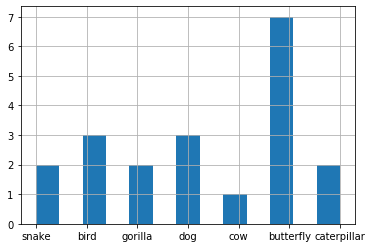

In [5]:
df['Animal'].hist(bins=13)

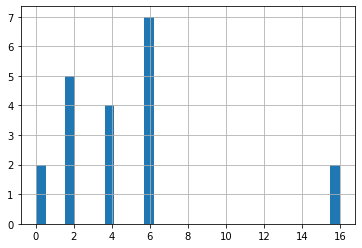

In [6]:
df['Legs'].hist(bins=31)

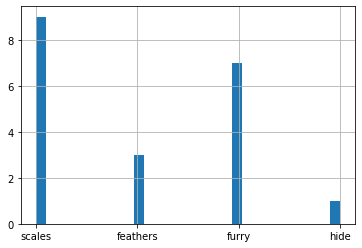

In [7]:
df['Body Covering'].hist(bins=31)

### The tree classifier from scikit-learn expects all numbers so convert the categorical items to dummy variables

In [8]:
col_list = list( df.columns)
objList = []
for col in col_list:
    if df.dtypes[col] == object:
        objList.append(col)
objList # this is our list of categorical variables

['Body Covering', 'Animal']

In [9]:
# turn all object types into dummy variables 1-Hot style
df_cats = pd.get_dummies(df[objList[:-1]], prefix_sep='_', drop_first=False) # 1-hot, not triangular
df_cats.head()

,Body Covering_feathers,Body Covering_furry,Body Covering_hide,Body Covering_scales
0,0,0,0,1
1,0,0,0,1
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [10]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Legs,0,0,2,2,2,2,2,4,4,4,4,6,6,6,6,6,6,6,16,16
Body Covering,scales,scales,feathers,feathers,feathers,furry,furry,furry,furry,furry,hide,scales,scales,scales,scales,scales,scales,scales,furry,furry
Animal,snake,snake,bird,bird,bird,gorilla,gorilla,dog,dog,dog,cow,butterfly,butterfly,butterfly,butterfly,butterfly,butterfly,butterfly,caterpillar,caterpillar


In [11]:
numList = [item for item in col_list if item not in objList] # this is our list of numeric variables

In [12]:
df_nums = df[numList]

In [13]:
df_vars = pd.concat([df_nums, df_cats],axis=1)
X = df_vars

In [14]:
df_vars.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Legs,0,0,2,2,2,2,2,4,4,4,4,6,6,6,6,6,6,6,16,16
Body Covering_feathers,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Body Covering_furry,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1
Body Covering_hide,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Body Covering_scales,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0


In [15]:
features = list( df_vars.columns)
features

['Legs',
 'Body Covering_feathers',
 'Body Covering_furry',
 'Body Covering_hide',
 'Body Covering_scales']

In [16]:
y = df.iloc[:, -1].values    # take all rows and only the last column

In [17]:
# We are now ready to train our Decision Tree classifier
clf=tree.DecisionTreeClassifier(max_leaf_nodes=None, criterion='gini') # gini is actually the default method
clf=clf.fit(X,y)

In [18]:
predictions = clf.predict(X)
accuracy = (predictions == y).sum() / len(predictions)
accuracy

1.0

## Now that we have created the decision tree, we will use graphviz to let us see the tree.

In [19]:
picName = 'animals-gini'

In [20]:
with open(folder + picName + '.dot','w') as f:
    # f=tree.export_text(clf,feature_names=features,outfile=f) # we could just output the rules - no fun!
    f = tree.export_graphviz(clf, feature_names=features,out_file=f)

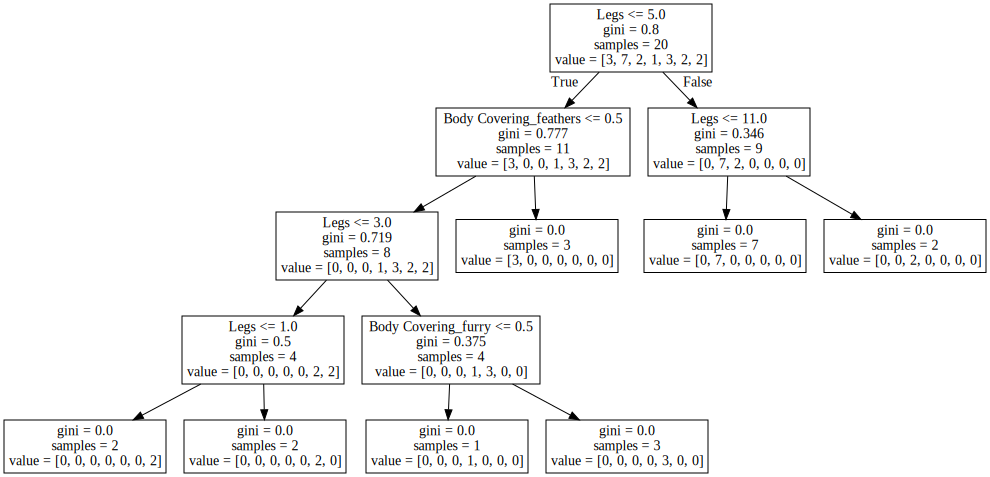

In [22]:
import graphviz
from graphviz import Digraph

with open(folder + picName + '.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## The next two cells are optional. I prefer to see my tree graph without scrolling so I have to convert it into a .png file.

In [23]:
def showTreeAsPNG(folder, picName):
    # My general philosopy is the Hippocratic 'first do no harm'
    cwd = os.getcwd() + '\\'                   # so I will first get the current working directory of the command
    os.chdir(folder)                           # prompt and later restore it.
    # Convert dot to png via graphviz           
    dotFile = folder + picName + '.dot'        # I will build a command line that I want to execute.   
    pngFile = folder + picName + '.png'        # Then, I'll run that batch file 
    command = 'dot -Tpng "' + dotFile  +  '" -o "' + pngFile + '"'
    f= open(folder + "tempCmd.bat","w")        # I put that command into a .bat (batch) file in the folder 
    f.write(command)                           # that contains my file to be converted. This avoids problems if the
    f.close()                                  # folder name contains spaces.
    # The following line executes the batch file.
    !tempCmd.bat 
    os.chdir(cwd)                              # When done, I reset the current working directory as it was.


(charts) C:\Users\Dave\Dropbox\Maryville\2020\Online\Week6 - Visualizations and Presentation Skills\DSCI408-508\Week5-staging>dot -Tpng "C:\Users\Dave\Dropbox\Maryville\2020\Online\Week6 - Visualizations and Presentation Skills\DSCI408-508\Week5-staging\animals-gini.dot" -o "C:\Users\Dave\Dropbox\Maryville\2020\Online\Week6 - Visualizations and Presentation Skills\DSCI408-508\Week5-staging\animals-gini.png" 


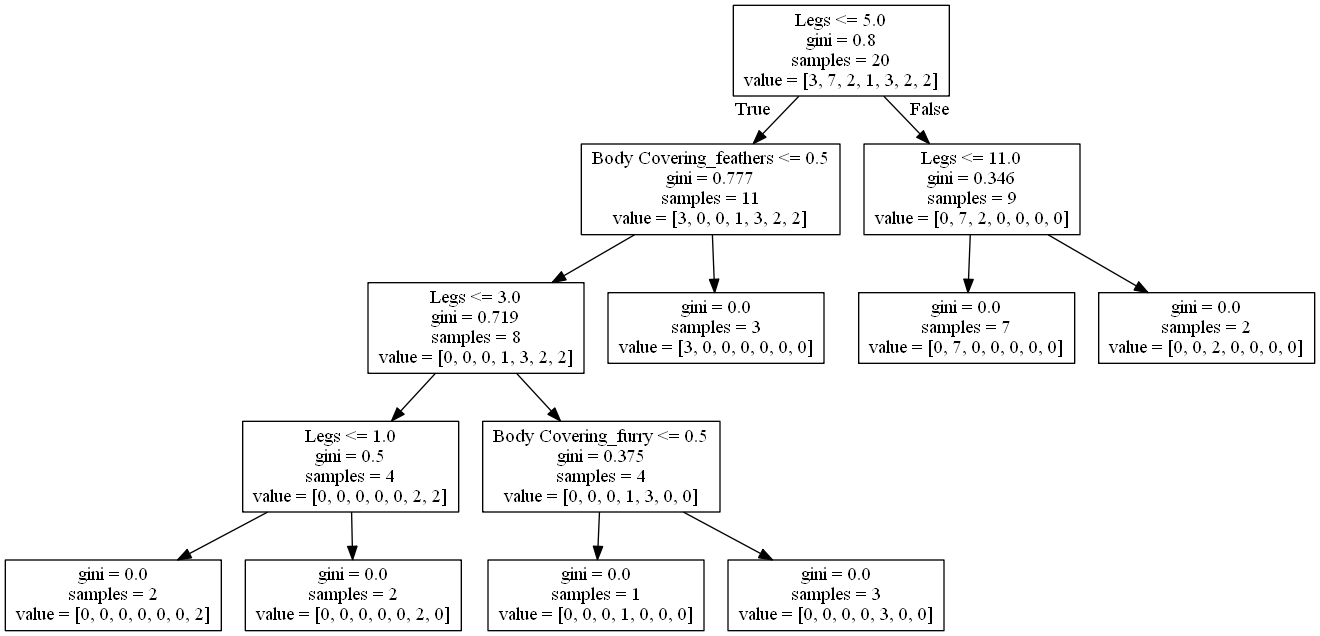

In [24]:
showTreeAsPNG(folder, picName)
Image(filename=folder+picName + '.png')    # Now, we get to see the entire tree without scrolling!

## Now, let's repeat the tree generation, but using the entropy method

In [25]:
clf=tree.DecisionTreeClassifier(criterion='entropy')
clf=clf.fit(X,y)

In [26]:
predictions = clf.predict(X)
accuracy = (predictions == y).sum() / len(predictions)
accuracy

1.0

In [27]:
picName = 'animals-entropy'

In [28]:
with open(folder + picName + '.dot','w') as f:
    f = tree.export_graphviz(clf, feature_names=features,out_file=f)

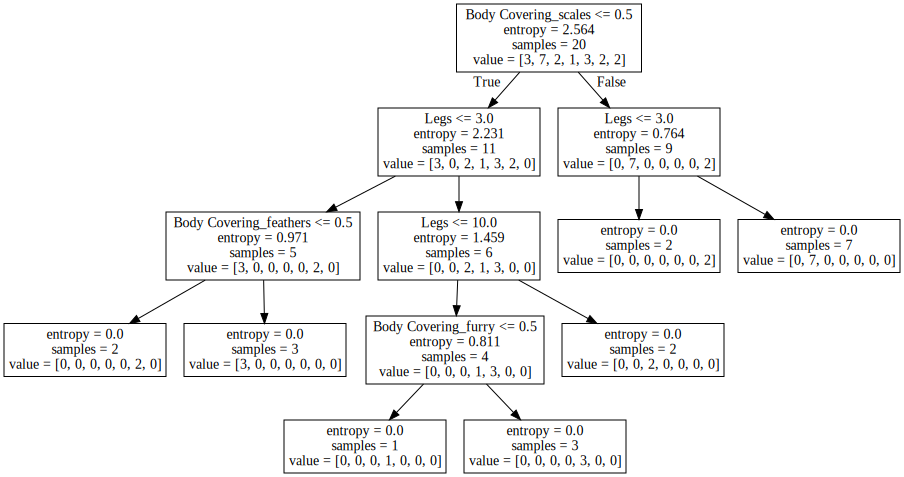

In [29]:
with open(folder + picName + '.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


(charts) C:\Users\Dave\Dropbox\Maryville\2020\Online\Week6 - Visualizations and Presentation Skills\DSCI408-508\Week5-staging>dot -Tpng "C:\Users\Dave\Dropbox\Maryville\2020\Online\Week6 - Visualizations and Presentation Skills\DSCI408-508\Week5-staging\animals-entropy.dot" -o "C:\Users\Dave\Dropbox\Maryville\2020\Online\Week6 - Visualizations and Presentation Skills\DSCI408-508\Week5-staging\animals-entropy.png" 


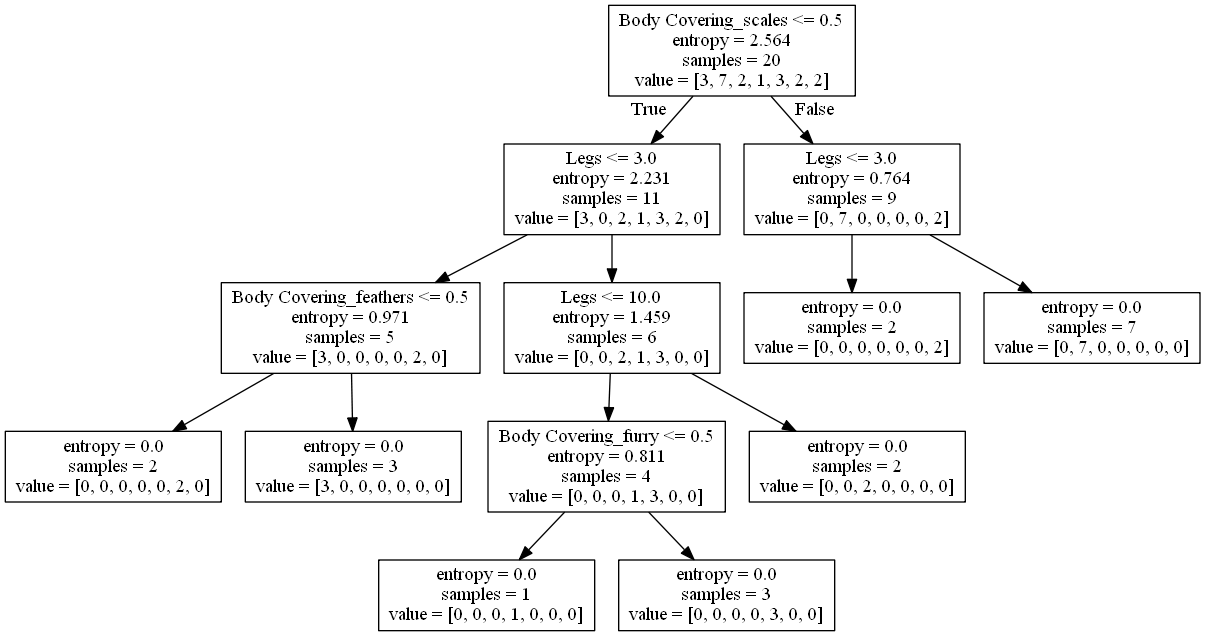

In [30]:
showTreeAsPNG(folder, picName)
Image(filename=folder+picName + '.png') 

## ASSIGNMENT for DSCI 408
### create a training set with a different mixof these animals, say 5 of each type. Run your new training set through this code and generate a new tree. See how the Gini and entropy values change in this new tree.

## ASSIGNMENT for DSCI 508
### create a decision tree to classify a group of vehicles:
* a sedan, a convertible, a motorcycle, a long-haul truck
* use features of number of wheels and type of roof (soft/hard/none)
* modify this code to create the decision tree